In [219]:
# Program      : Euler's Method                                                                            
# Author       : MOOC team Mathematical Modelling Basics
# Created      : April, 2020

In [220]:
#Differential Equation of fish population
def fishPopulation(startingPopulation, dt):
    P = startingPopulation
    dPdt = 0.7*P*(1-P/750)-20
    P += dPdt * dt
    return P

In [221]:
#System of Differential Equations of rainbow and deadly fish population
def twoFishPopulation(startingPopulations, dt):
    P = startingPopulations[0]
    G = startingPopulations[1]
    #The first equation
    dPdt = 0.7*P-0.007*P**2-0.04*P*G
    #Second equation
    dGdt = -0.25*G+0.008*P*G

    P += dPdt
    G += dGdt
    return [P, G]


In [222]:
from math import ceil

def eulersMethod(dt, startingPopulation, days, ode):
    numberOfTimes = int(days/dt)
    if (dt <= 0 or numberOfTimes <= 0 or isinstance(numberOfTimes, int)==False):
         print("Don't do that")
         return [0]*numberOfTimes

    #This function returns an array that contains the history of the fish population. 
    else:
        currentPopulation = startingPopulation
        populationHistory = [0]
        populationHistory[0] = currentPopulation
        for i in range(numberOfTimes):
            currentPopulation = ode(currentPopulation, dt)
            #If the population drops below 0, quit
            #if (currentPopulation <= 0):
            #    print(f"less than 0 population at {i} with value {currentPopulation}")
            #    return populationHistory

            populationHistory.append(currentPopulation) 

    return populationHistory

In [223]:
def printResults(results, dt):
    for i in range(len(results)):
        print(f"On day {i*dt} the amount of fish were {results[i]}")

In [224]:
import matplotlib.pyplot as plt
from math import ceil

def plotResults(results, dt):    
    for j in range(len(results)):
        plt.plot([i*dt[j]+1 for i in range(len(results[j]))], results[j])
    plt.ylabel('Fish')
    plt.xlabel('Days')
    plt.grid(True)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

In [225]:
def errorFunction(result, resultTimesTwo, dt):
    for i in range(len(resultTimesTwo)):
        print(f"at day {i*dt} the error is {result[2*i]-resultTimesTwo[i]}")


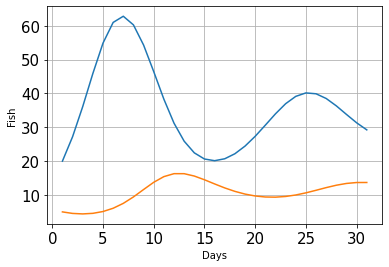

On day 0 the amount of fish were [20, 5]
On day 1 the amount of fish were [27.2, 4.55]
On day 2 the amount of fish were [36.11072, 4.4025799999999995]
On day 3 the amount of fish were [45.9011219612672, 4.573777669260799]
On day 4 the amount of fish were [54.88585528821394, 5.109865464909283]
On day 5 the amount of fish were [61.000380756962244, 6.076073790275986]
On day 6 the amount of fish were [62.827609530805866, 7.52219786042086]
On day 7 the amount of fish were [60.2717081673627, 9.422462075219526]
On day 8 the amount of fish were [54.31683687000748, 11.610109631740038]
On day 9 the amount of fish were [46.46141406966663, 13.752577671086037]
On day 10 the amount of fish were [38.31519470889896, 15.426146898927168]
On day 11 the amount of fish were [31.217219104443462, 16.298056750519155]
On day 12 the amount of fish were [25.896468754945662, 16.293782631350247]
On day 13 the amount of fish were [22.451549913070966, 15.595948436013789]
On day 14 the amount of fish were [20.6330016

In [228]:
dt = [1]
startingPopulation = [20, 5]
days = 30

populationHistory = []
populationHistory.append(eulersMethod(dt[0],startingPopulation,days, twoFishPopulation))
plotResults(populationHistory, dt)
printResults(populationHistory[0], dt[0])

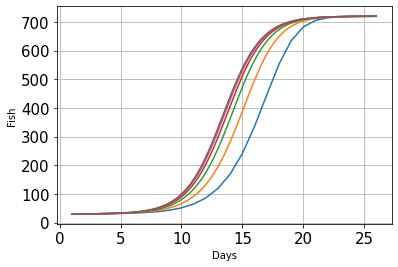

On day 0 the amount of fish were 30
On day 1 the amount of fish were 30.16
On day 2 the amount of fish were 30.423016106666665
On day 3 the amount of fish were 30.85527146624193
On day 4 the amount of fish were 31.56538356717283
On day 5 the amount of fish were 32.731203520433915
On day 6 the amount of fish were 34.64313641310133
On day 7 the amount of fish were 37.77319479510463
On day 8 the amount of fish were 42.88273785631755
On day 9 the amount of fish were 51.184320430089755
On day 10 the amount of fish were 64.56816571712181
On day 11 the amount of fish were 85.87477022997163
On day 12 the amount of fish were 119.10426497303804
On day 13 the amount of fish were 169.23714624838152
On day 14 the amount of fish were 240.97135106330558
On day 15 the amount of fish were 335.4552509098963
On day 16 the amount of fish were 445.2457162080036
On day 17 the amount of fish were 551.8902196054665
On day 18 the amount of fish were 633.9360797995344
On day 19 the amount of fish were 682.60804

In [227]:
#Main
days = 25
startingPopulation = 30
dt = [1, 1/2, 1/4, 1/8, 1/16, 1/32]

#Fish at 13 with dt= 1/8   407.24955562528396


populationHistory = []
populationHistory.append(eulersMethod(dt[0],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[1],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[2],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[3],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[4],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[5],startingPopulation,days,fishPopulation))
plotResults(populationHistory, dt)
printResults(populationHistory[0], dt[0])
errorFunction(populationHistory[2], populationHistory[0], dt[0])